# Monte Carlo Estimation of Pi (π)

This notebook demonstrates how to estimate the value of Pi using a simple Monte Carlo simulation.

**Concept:**
1. Imagine a square with corners at (0,0), (1,0), (1,1), and (0,1).
2. Imagine a quarter circle centered at the origin (0,0) with a radius of 1, fitting perfectly within this square.
3. The area of the square is 1² = 1.
4. The area of the quarter circle is πr²/4 = π/4.
5. If we generate random points uniformly within the square, the ratio of points falling *inside* the quarter circle to the total number of points should approximate the ratio of the areas: (Area of quarter circle) / (Area of square) = (π/4) / 1 = π/4.
6. A point (x, y) is inside the circle if x² + y² ≤ 1.
7. Therefore, we can estimate Pi by calculating: π ≈ 4 * (points inside circle) / (total points).

## 1. Import Necessary Libraries

In [6]:
import math # For the actual value of pi for comparison
import sys
import os

# Add the project root directory to the Python path to import src modules
# Get the current working directory (notebooks often run from project root or notebooks/)
current_dir = os.getcwd()
# Assuming the notebook is in 'notebooks/' or project root
if os.path.basename(current_dir) == 'notebooks':
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
else:
    project_root = current_dir # Assume running from project root

if project_root not in sys.path:
    sys.path.insert(0, project_root)


try:
    from src.monte_carlo.pi_estimation import estimate_pi
    print("Successfully imported estimate_pi from src")
except ImportError as e:
    print(f"Error importing estimate_pi: {e}")
    print("Please ensure you are running this notebook from the 'learn_statistics' root directory or the 'notebooks' subdirectory.")

Successfully imported estimate_pi from src


## 2. Define Simulation Parameters

In [2]:
# We will test the estimation with an increasing number of points
num_points_to_test = [100, 1000, 10000, 100000, 1000000, 10000000]

## 3. Run the Simulation

In [3]:
print("Estimating Pi using Monte Carlo:\n")
estimates = []

for num_points in num_points_to_test:
    # Ensure the function is available before calling
    if 'estimate_pi' in globals():
        pi_estimate = estimate_pi(num_points)
        estimates.append(pi_estimate)
        error = abs(pi_estimate - math.pi)
        print(f"  Points: {num_points:<10} | Estimated Pi: {pi_estimate:.6f} | Error: {error:.6f}")
    else:
        print(f"Skipping {num_points} points, estimate_pi function not imported correctly.")

print(f"\nActual Pi: {math.pi:.6f}")

Estimating Pi using Monte Carlo:

  Points: 100        | Estimated Pi: 3.200000 | Error: 0.058407
  Points: 1000       | Estimated Pi: 3.180000 | Error: 0.038407
  Points: 10000      | Estimated Pi: 3.128400 | Error: 0.013193
  Points: 100000     | Estimated Pi: 3.134480 | Error: 0.007113
  Points: 1000000    | Estimated Pi: 3.139268 | Error: 0.002325
  Points: 10000000   | Estimated Pi: 3.140852 | Error: 0.000740

Actual Pi: 3.141593


## 4. Visualize Convergence (Optional)

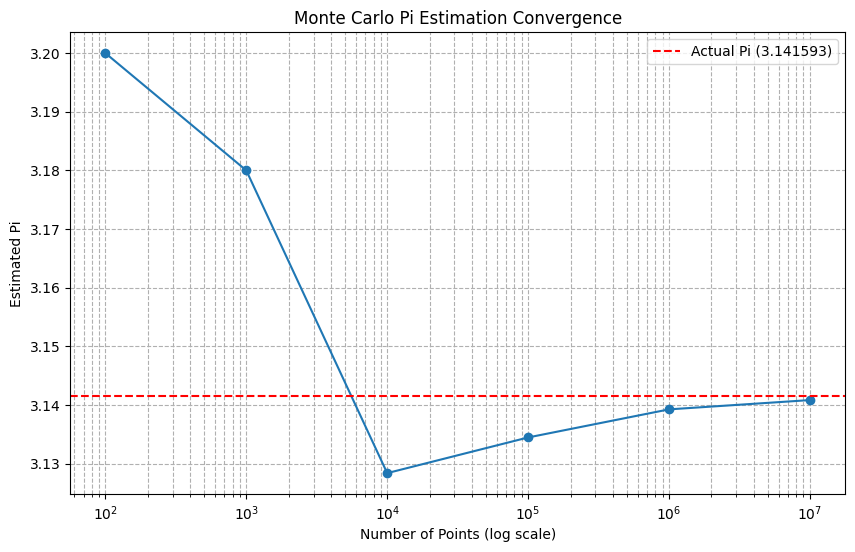

In [4]:
import matplotlib.pyplot as plt

# Ensure plots appear inline in the notebook
%matplotlib inline 

if estimates: # Only plot if estimates were generated
    plt.figure(figsize=(10, 6))
    plt.plot(num_points_to_test, estimates, marker='o', linestyle='-')
    plt.axhline(y=math.pi, color='r', linestyle='--', label=f'Actual Pi ({math.pi:.6f})')
    plt.xscale('log') # Use log scale for the number of points
    plt.xlabel("Number of Points (log scale)")
    plt.ylabel("Estimated Pi")
    plt.title("Monte Carlo Pi Estimation Convergence")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("No estimates to plot.")


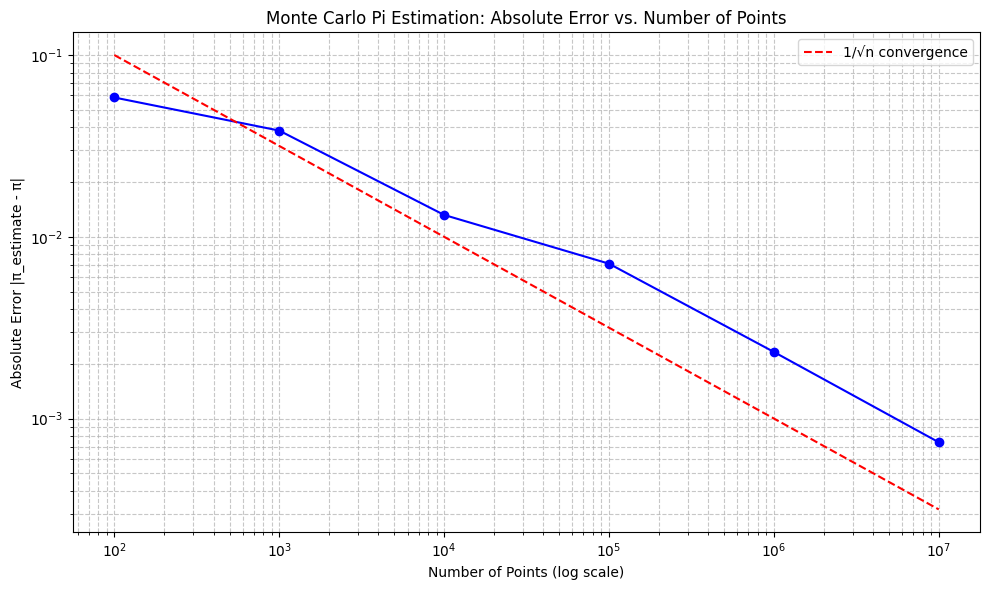

In [5]:
# Calculate absolute errors
errors = [abs(est - math.pi) for est in estimates]

# Create the error plot
plt.figure(figsize=(10, 6))
plt.plot(num_points_to_test, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Log scale for x-axis (number of points)
plt.yscale('log')  # Log scale for y-axis (error values tend to decrease exponentially)
plt.xlabel("Number of Points (log scale)")
plt.ylabel("Absolute Error |π_estimate - π|")
plt.title("Monte Carlo Pi Estimation: Absolute Error vs. Number of Points")
plt.grid(True, which="both", ls="--", alpha=0.7)

# Add a trend line to show convergence rate
plt.plot(num_points_to_test, [1/math.sqrt(n) for n in num_points_to_test], 
         'r--', label='1/√n convergence')
plt.legend()
plt.tight_layout()
plt.show()

As the number of points increases, the estimate generally gets closer to the true value of Pi.